# Diffusion Theory 

In [6]:
# Our numerical workhorses
import numpy as np
import pandas as pd

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Seaborn, useful for graphics
import seaborn as sns

# favorite Seaborn settings for notebooks
rc={'lines.linewidth': 2, 
    'axes.facecolor' : 'F4F3F6',
    'axes.edgecolor' : '000000',
    'axes.linewidth' : 1.2,
    'grid.color' : 'a6a6a6',
    'lines.linewidth': 2,
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.major' : 13,
    'xtick.labelsize': 'large',
    'ytick.labelsize': 13,
    'font.family': 'Lucida Sans Unicode',
    'grid.linestyle': ':',
    'grid.linewidth': 1.5,
    'mathtext.fontset': 'stixsans',
    'mathtext.sf': 'sans',
    'legend.frameon': True,
    'legend.fontsize': 13}

plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rc('mathtext', fontset='stixsans', sf='sans')
sns.set_style('darkgrid', rc=rc)
sns.set_palette("colorblind", color_codes=True)
sns.set_context('notebook', rc=rc)

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

## Mutation and Selection.

The steady state distribution for mutation and selection is of the form
$$
P(f) \propto \left[ f(1-f) \right]^{2N\mu - 1},
\tag{1}
$$
where $f$ is the allele frequency $\mu$ is the mutation rate, and $N$ is the population size (effective population size can be).

Let's plot this for different values of $\mu$

In [28]:
def mut_drift(f, N_mu):
    return (f * (1 - f))**(2 * N_mu - 1)

/Users/razo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


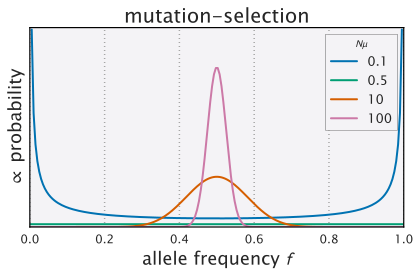

In [39]:
# Define parameters
N_mu = [0.1, 1 / 2, 10, 100]
f = np.linspace(0, 1, 200)

fig, ax = plt.subplots(1, 1)
# Loop through mutation rates and plot the distribution
for nm in N_mu:
    if nm < 1:
        plt.plot(f, mut_drift(f, nm) / 700,
                 label=str(nm))
    else:
        plt.plot(f, mut_drift(f, nm) / np.sum(mut_drift(f, nm)), 
                 label=str(nm))
ax.legend(title='$N \mu$')
ax.set_xlabel('allele frequency $f$')
ax.set_ylabel('$\propto$ probability')
ax.set_title('mutation-selection')
ax.axes.get_yaxis().set_ticks([])
plt.tight_layout()
plt.savefig('fig/mutation_selection.png')